In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score
from graphviz import Source
from IPython.display import Image
%config IPCompleter.greedy=True

# a

In [2]:
glass = pd.read_csv('glass.csv')
glass_X = glass.drop(['Type', 'Id'], axis=1)
glass_y = glass.Type
glass_y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [3]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(glass_X, glass_y)
print('balanced accuracy:', balanced_accuracy_score(glass_y, clf.predict(glass_X)))

balanced accuracy: 1.0


In [4]:
print('balanced accuracy on CV:', cross_val_score(clf, glass_X, glass_y, cv=5, scoring='balanced_accuracy'))

balanced accuracy on CV: [0.45138889 0.59801587 0.71150794 0.65396825 0.38412698]


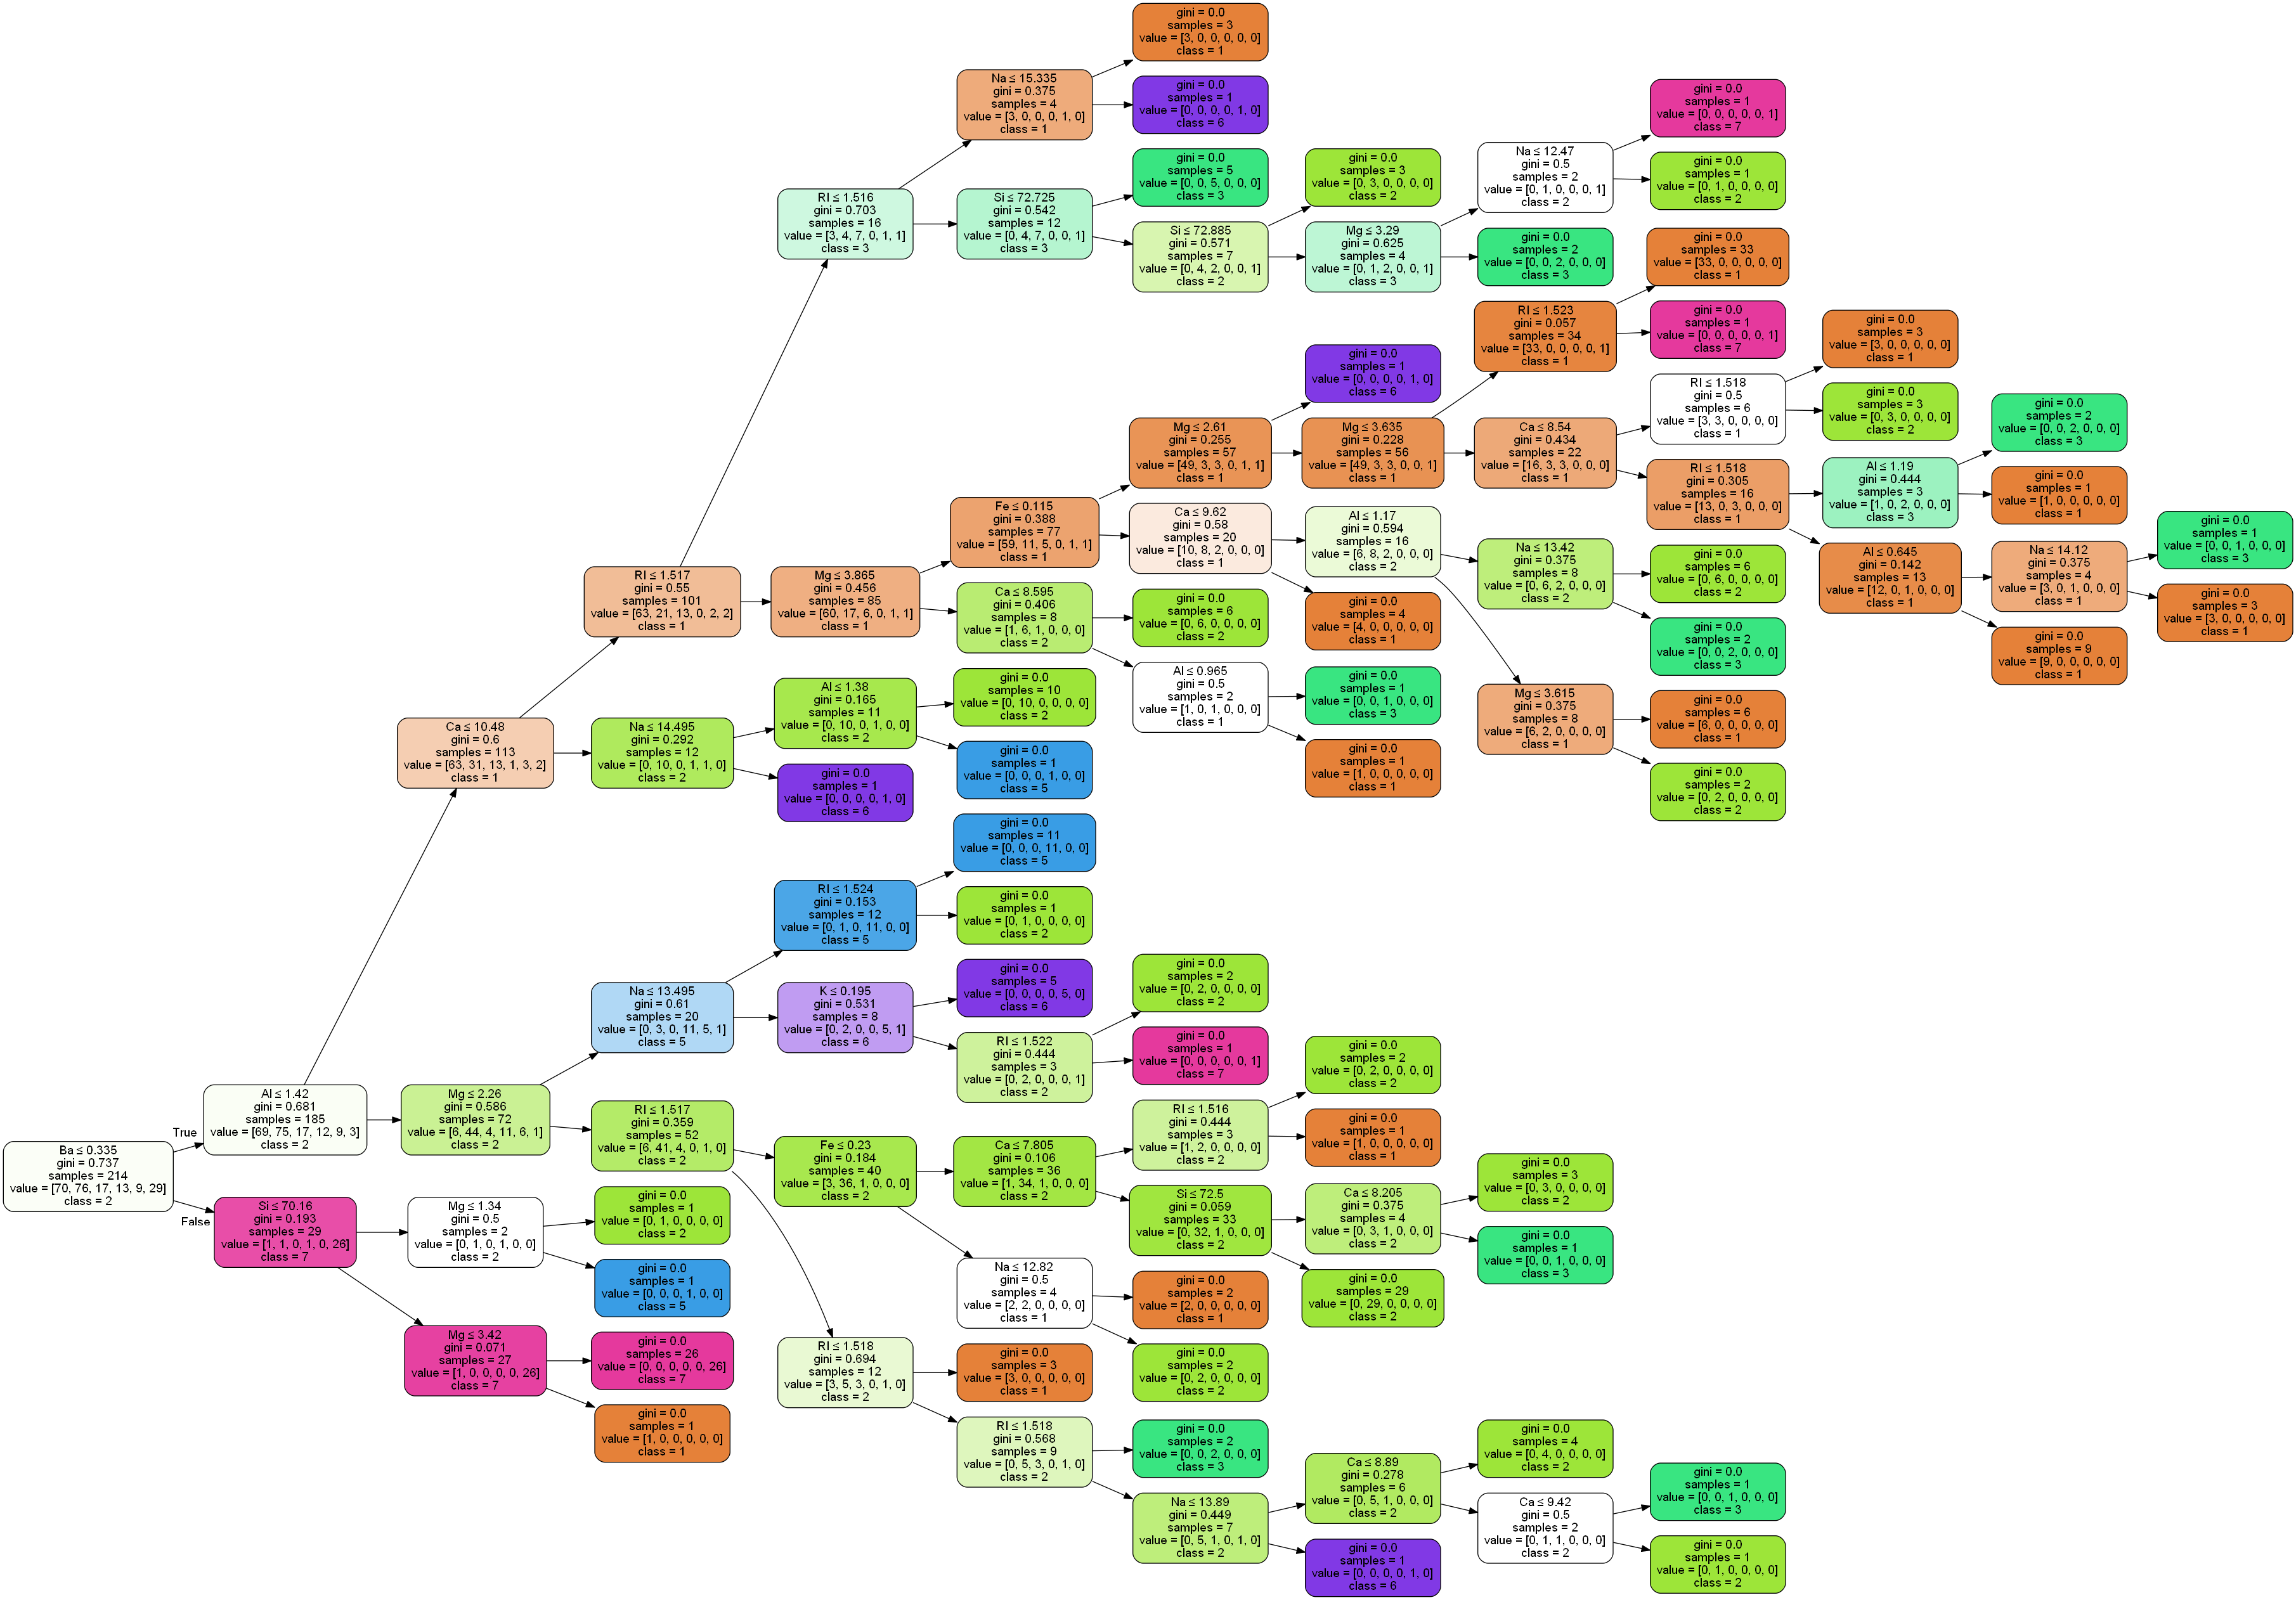

In [5]:
graph = Source(tree.export_graphviz(clf, out_file=None, rotate=True,
                                   feature_names=list(glass_X), class_names=glass_y.unique().astype(str), 
                                   filled = True, rounded=True, special_characters=True))

png_bytes = graph.pipe(format='png')
with open('./task5a.png','wb') as f:
    f.write(png_bytes)

Image(filename = './task5a.png')

In [6]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 20),
              'min_samples_leaf': range(1, 100),
              'min_samples_split': range(2, 100)}

df = pd.DataFrame(columns=['parameter', 'value', 'mean_cv_score'])

for i, criterion in enumerate(parameters['criterion']):
    clf = tree.DecisionTreeClassifier(random_state=42, criterion=criterion)
    df = df.append({'parameter': 'criterion', 'value': criterion, 
                    'mean_cv_score': cross_val_score(clf, glass_X, glass_y, cv=5, scoring='balanced_accuracy').mean()}, 
                   ignore_index=True)
    
for i, max_depth in enumerate(parameters['max_depth']):
    clf = tree.DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    df = df.append({'parameter': 'max_depth', 'value': str(max_depth), 
                    'mean_cv_score': cross_val_score(clf, glass_X, glass_y, cv=5, scoring='balanced_accuracy').mean()}, 
                   ignore_index=True)

for i, min_samples_leaf in enumerate(parameters['min_samples_leaf']):
    clf = tree.DecisionTreeClassifier(random_state=42, min_samples_leaf=min_samples_leaf)
    df = df.append({'parameter': 'min_samples_leaf', 'value': str(min_samples_leaf), 
                    'mean_cv_score': cross_val_score(clf, glass_X, glass_y, cv=5, scoring='balanced_accuracy').mean()}, 
                   ignore_index=True)

for i, min_samples_split in enumerate(parameters['min_samples_split']):
    clf = tree.DecisionTreeClassifier(random_state=42, min_samples_split=min_samples_split)
    df = df.append({'parameter': 'min_samples_split', 'value': str(min_samples_split), 
                    'mean_cv_score': cross_val_score(clf, glass_X, glass_y, cv=5, scoring='balanced_accuracy').mean()}, 
                   ignore_index=True)

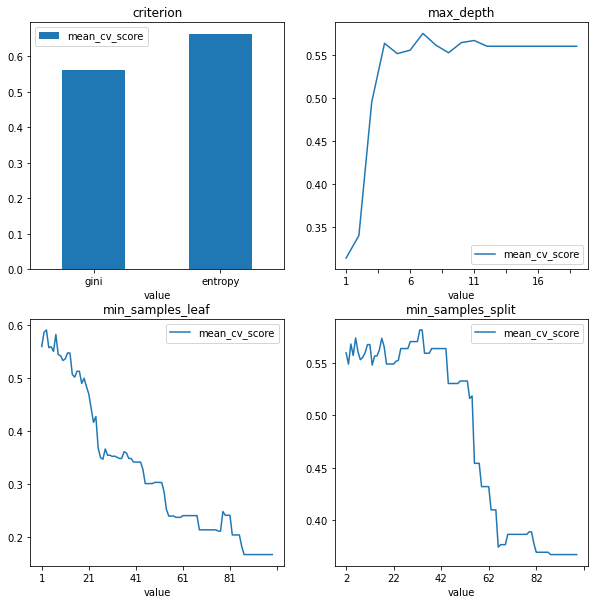

In [7]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df[df.parameter=='criterion'].plot(ax=ax[0, 0], x='value', kind='bar', title='criterion')
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(0)
df[df.parameter=='max_depth'].plot(ax=ax[0, 1], x='value', title='max_depth')
df[df.parameter=='min_samples_leaf'].plot(ax=ax[1, 0], x='value', title='min_samples_leaf')
_ = df[df.parameter=='min_samples_split'].plot(ax=ax[1, 1], x='value', title='min_samples_split')

# b

In [8]:
spam7 = pd.read_csv('spam7.csv').replace({'y': 1, 'n': 0})
spam7_X = spam7.drop('yesno', axis=1)
spam7_y = spam7.yesno
spam7_y.value_counts()

0    2788
1    1813
Name: yesno, dtype: int64

In [9]:
spam7_X_train, spam7_X_test, spam7_y_train, spam7_y_test = train_test_split(spam7_X, spam7_y, test_size=0.25)

In [10]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(spam7_X_train, spam7_y_train)
print('Train accuracy: ', balanced_accuracy_score(spam7_y_train, clf.predict(spam7_X_train)))
print('Test accuracy: ', balanced_accuracy_score(spam7_y_test, clf.predict(spam7_X_test)))
print('Depth:', clf.get_depth())

Train accuracy:  0.9632720381807973
Test accuracy:  0.8464437387611432
Depth: 26


In [11]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 10),
              'min_samples_leaf': range(1, 100),
              'min_samples_split': range(2, 100)}
rand_search_cv = RandomizedSearchCV(clf, parameters, n_iter=30, scoring='balanced_accuracy', cv=5, n_jobs=-1, random_state=42)

In [12]:
rand_search_cv.fit(spam7_X, spam7_y)
best_clf = rand_search_cv.best_estimator_
print('Train accuracy: ', balanced_accuracy_score(spam7_y_train, best_clf.predict(spam7_X_train)))
print('Test accuracy: ', balanced_accuracy_score(spam7_y_test, best_clf.predict(spam7_X_test)))
print('Params:', rand_search_cv.best_params_)

Train accuracy:  0.8611559517125211
Test accuracy:  0.8607067248217725
Params: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'entropy'}


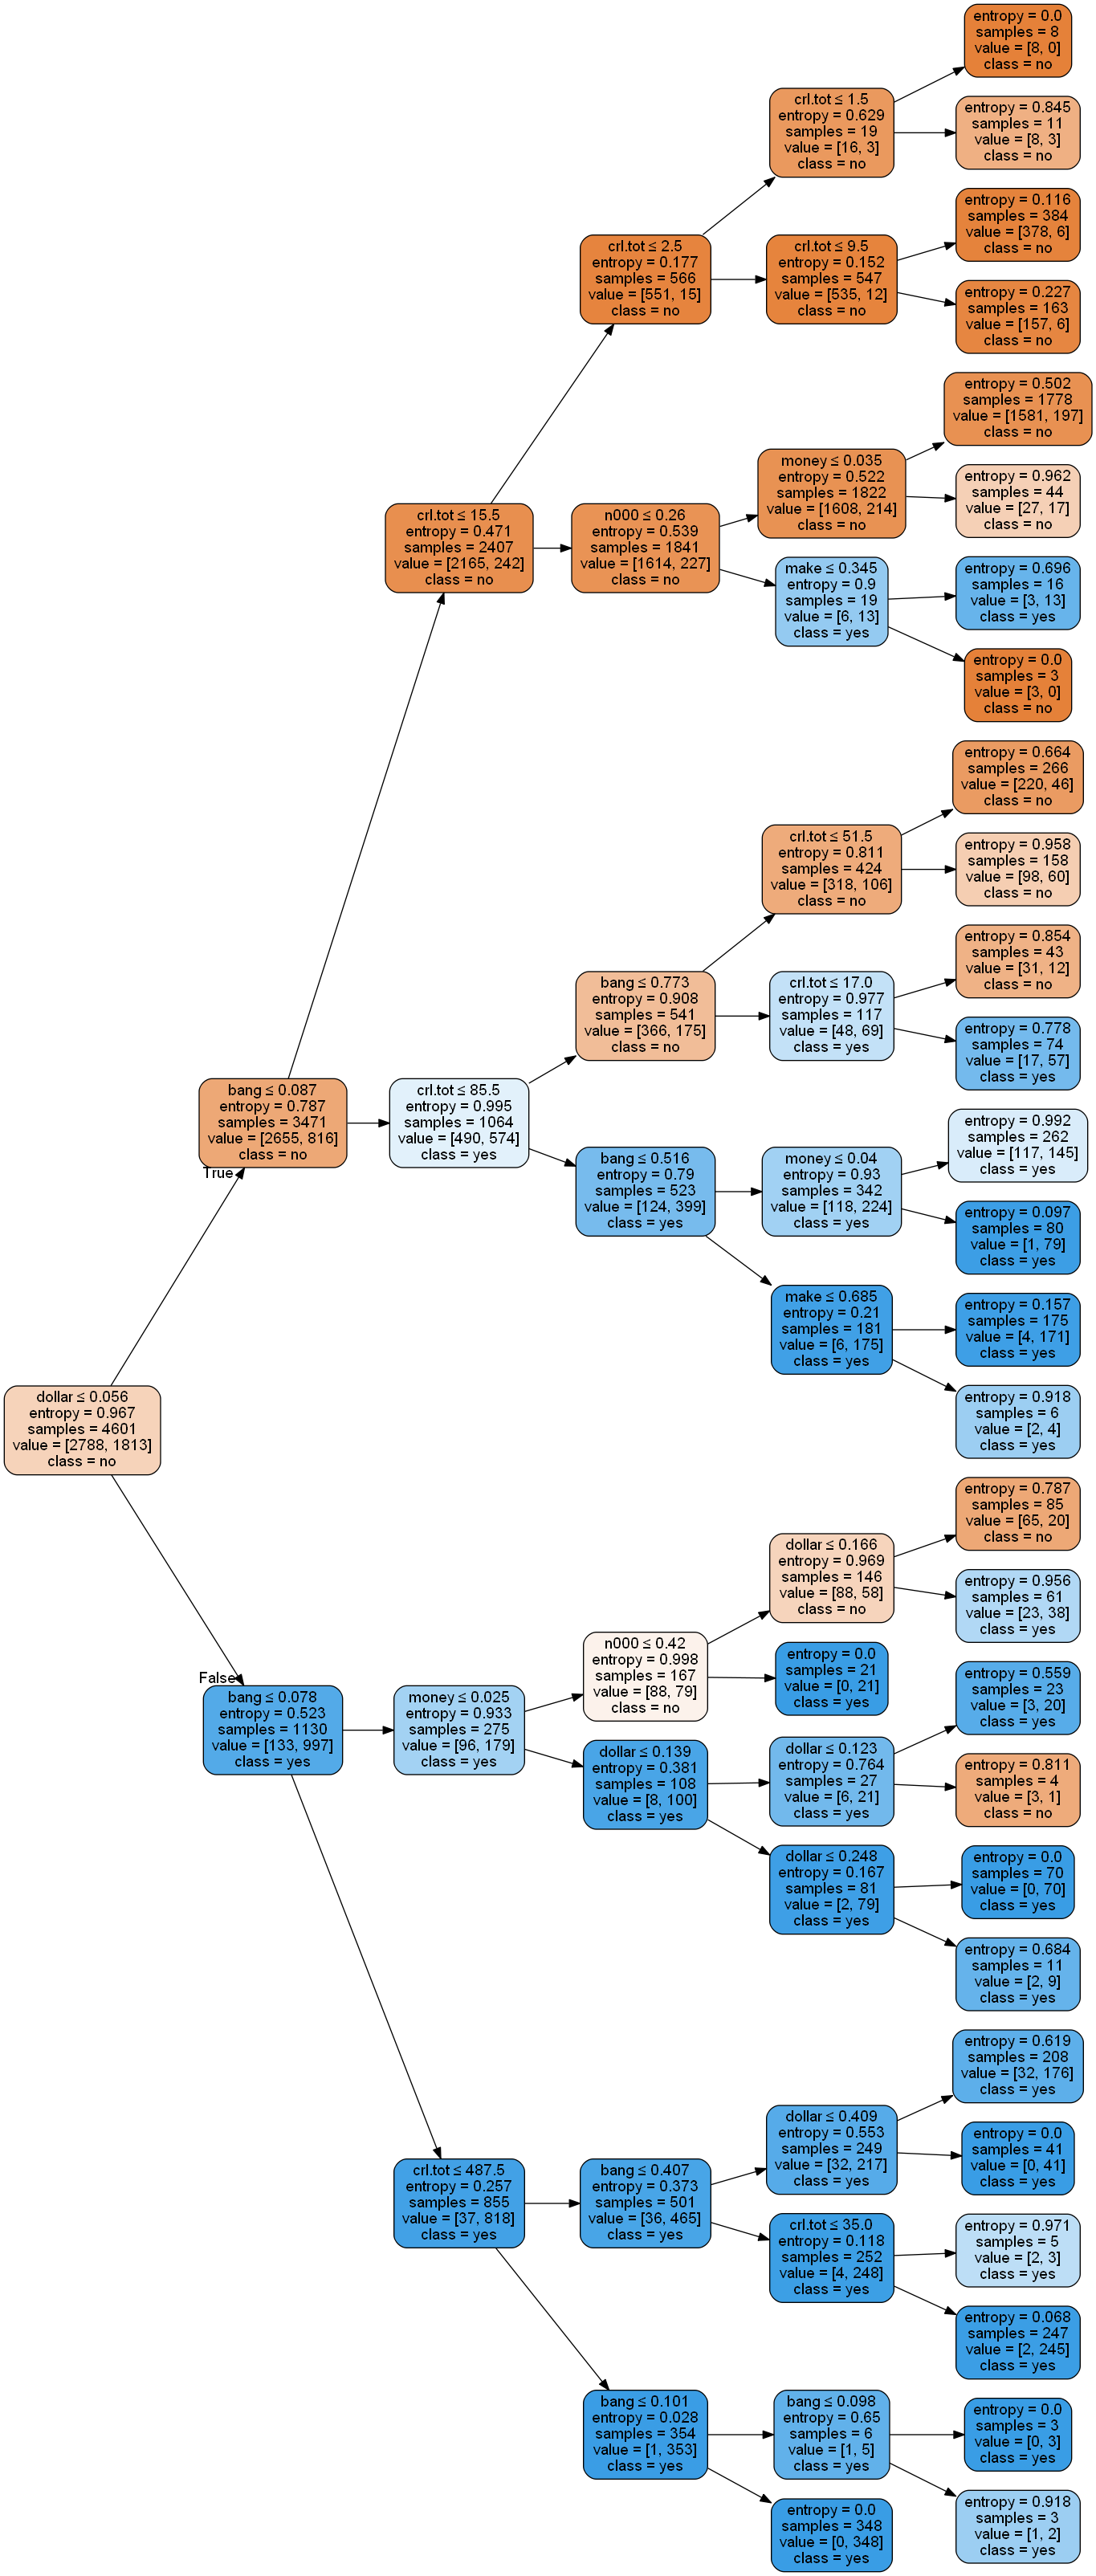

In [13]:
graph = Source(tree.export_graphviz(best_clf, out_file=None, rotate=True,
                                   feature_names=list(spam7_X), class_names=['no', 'yes'],
                                   filled = True, rounded=True, special_characters=True))

png_bytes = graph.pipe(format='png')
with open('task5b.png','wb') as f:
    f.write(png_bytes)

Image(filename = 'task5b.png')

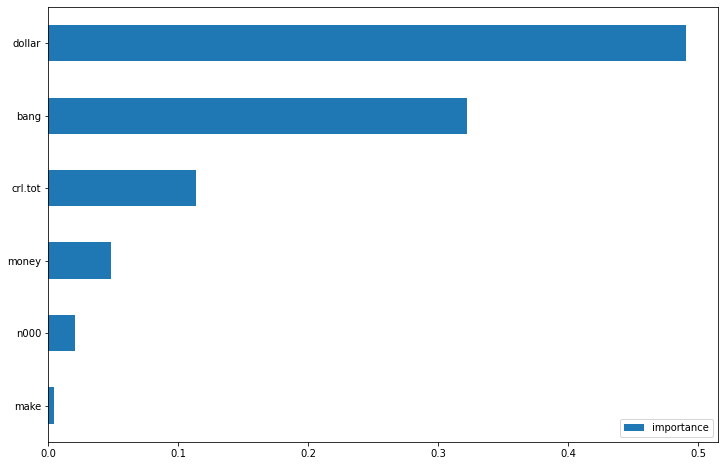

In [14]:
imp = pd.DataFrame(best_clf.feature_importances_, index=list(spam7_X), columns=['importance'])
_ = imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [15]:
spam7.corr()

,crl.tot,dollar,bang,money,n000,make,yesno
crl.tot,1.000000,0.201948,0.036321,0.080993,0.165977,0.089165,0.249164
dollar,0.201948,1.000000,0.142913,0.104691,0.310971,0.117419,0.323629
bang,0.036321,0.142913,1.000000,0.051076,0.070103,0.058292,0.241888
money,0.080993,0.104691,0.051076,1.000000,0.052587,0.188155,0.216111
n000,0.165977,0.310971,0.070103,0.052587,1.000000,0.134072,0.334787
make,0.089165,0.117419,0.058292,0.188155,0.134072,1.000000,0.126208
yesno,0.249164,0.323629,0.241888,0.216111,0.334787,0.126208,1.000000
